<h1>Medical Cost Prediction</h1>

In [64]:
#Importing data manipulation and data visualization libraries
#The comments will come before the statements which are to be executed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
df = pd.read_csv('insurance.csv')

Exploratory Data Analysis + Data Cleaning + Feature Selection via visualization or correlation coeff

<h2>Exploratory Data Analysis</h2>

<h3>Basic Data Exploration</h3>

In [66]:
# Age: quantitative. discrete. oridinal
# Sex: qualitative/categorical. nominal
# bmi: quantitative. continious
# children: quantitative. discrete.ordinal
# smoker: qualitative. nominal
# region: qualitative. nominal
# chargrs: quantitative: continious
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [67]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [68]:
#Displays shape of the dataset
df.shape

(1338, 7)

In [69]:
#Displays info about null values and data types in each column of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
#Outputs set of statistics for each column of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<h3>Data Cleaning</h3>

In [71]:
#There are no missing values. Therefore no treatment for missing values required
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

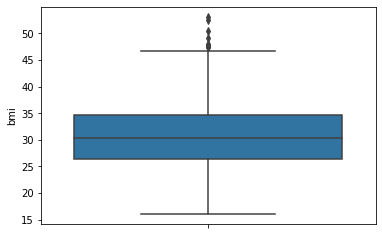

In [72]:
#The columns with continious data are bmi and medical cost. We can use box plots to spot potential outliers

sns.boxplot(y=df['bmi'])

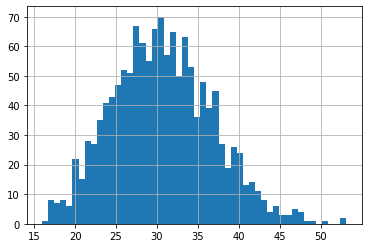

In [73]:
#We can plot univariate distribution of bmi using histogram
#Bmi seems to be normally distributed
df['bmi'].hist(bins=50)

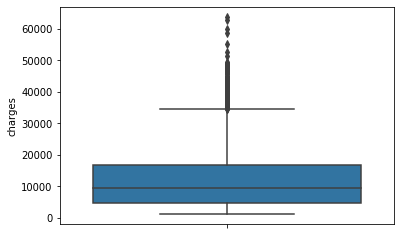

In [74]:
sns.boxplot(y=df['charges'])

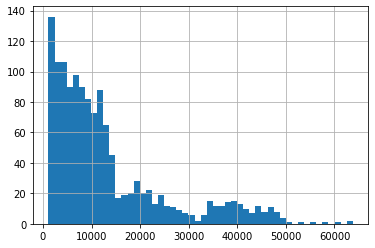

In [75]:
#the charges seem to have a exponential distribution
df['charges'].hist(bins=50)

In [76]:
#Calculates mean of bmi column
mean = np.mean(df['bmi'])
#Calculates standard deviation of bmi column
standard_deviation =np.std(df['bmi'])
#Calculates upper limit of observations
upper_limit =mean+(3*standard_deviation)
#Calculates lower limit of observations
lower_limit =mean-(3*standard_deviation)
print(upper_limit)
print(lower_limit)

48.95111978575483
12.375673936218252


In [77]:
#Outputs observations which do not lie within feasible region
df[(df['bmi']>upper_limit) | (df['bmi']<lower_limit)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [78]:
#Outputs part of dataframe that lies within feasible region 
df[(df['bmi']<upper_limit) & (df['bmi']>lower_limit)]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [79]:
#Asigns new variable to this sub dataframe
df2=df[(df['bmi']<upper_limit) & (df['bmi']>lower_limit)]

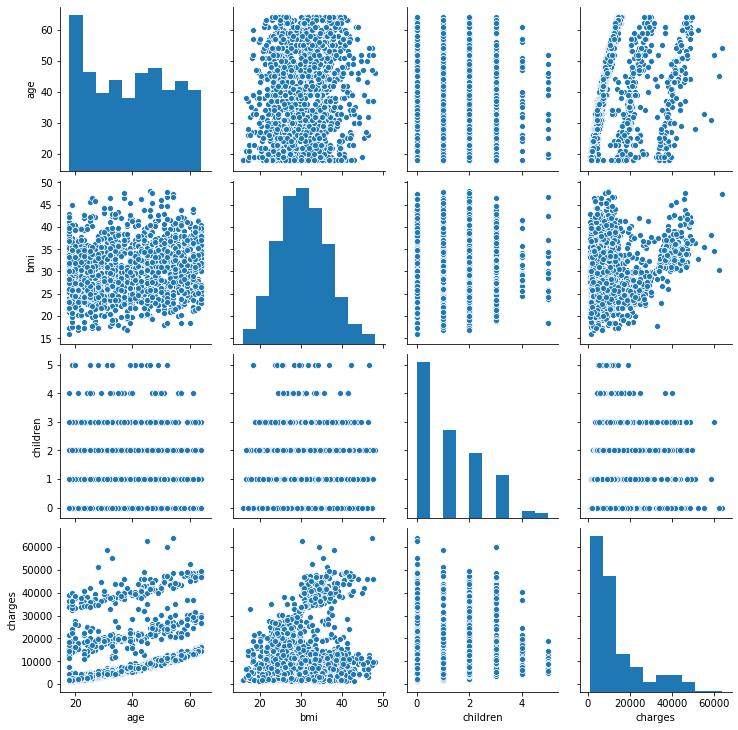

In [80]:
#Outputs scatter plots for every combination of columns with numerical data
#It shows us the bivariate distribution in the data
#Outliers are not clearly aparent in bivariate anaylsis of numerical columns. No trends clearly apparent
#We can see that with increase in age the medical costs increase. There seem to be bands. you 
#the medical charges when you are young seems to determine what charge you have when you are older
sns.pairplot(data=df2)

<h2>Feature Selection</h2>

In [81]:
#Lets plot all categorical variables against the numerical label we are trying to predict variables.

In [82]:
#We can use a boxplot to plot continious variables against categorical variables
#Can we also use scatter plot like the one used in logistic regression modela

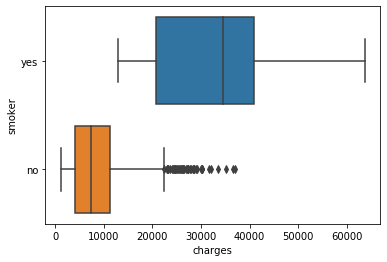

In [83]:
#median charges for smokers much higher than those with are non smokers
sns.boxplot(x='charges',y='smoker',data=df2)

In [84]:
#Mean charges for smokers higher than non smokers
print('mean charges for smoker {}'.format(df[df['smoker']=='yes']['charges'].mean()))
print('mean charges for non smokers {}'.format(df[df['smoker']=='no']['charges'].mean()))

mean charges for smoker 32050.23183153285
mean charges for non smokers 8434.268297856199


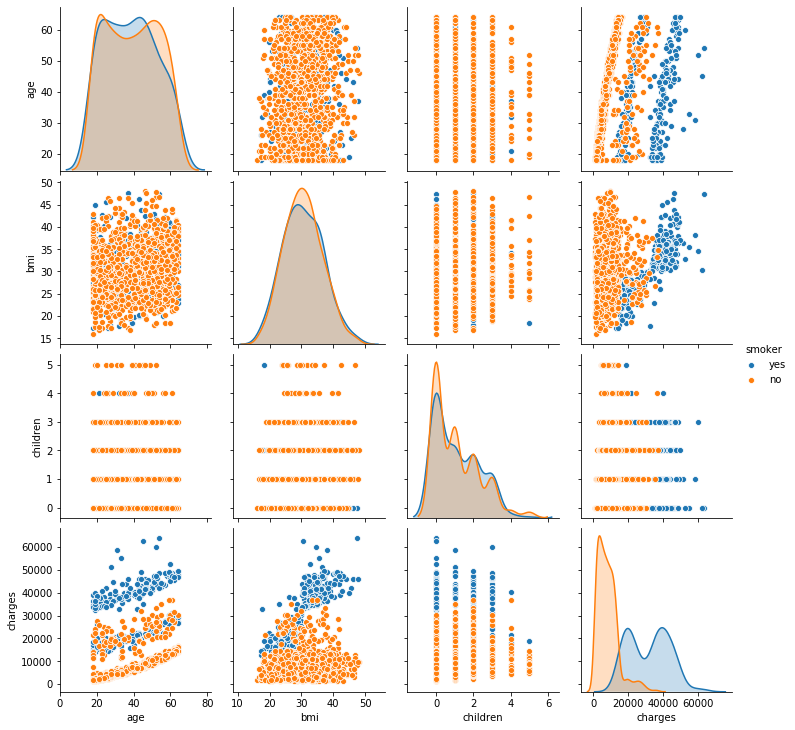

In [85]:
#The charge vs age and charge vs bmi can be easily clustered by whether a person is a smoker or not
#People who are smokers have generally higher charges for all ages and bmi
sns.pairplot(data=df2,hue='smoker')

In [86]:
#Lets look into the charges versus age plot in more details. We will try to fit a lines of best fit to this

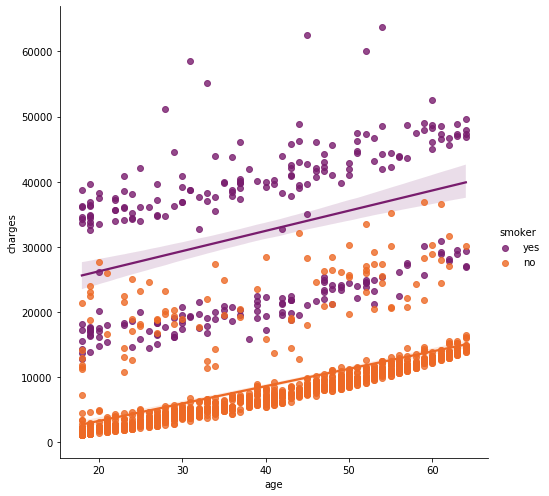

In [87]:
sns.lmplot(x='age',y='charges',data=df2,hue='smoker', palette = 'inferno', height = 7)


In [88]:
#The smoker cateogrical variables seems to be a very good predictor for charge

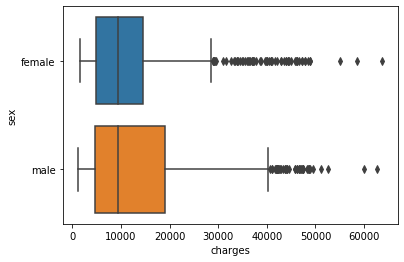

In [89]:
#Interquartile range higher in charges for men than women. 
sns.boxplot(x='charges',y='sex',data=df2)

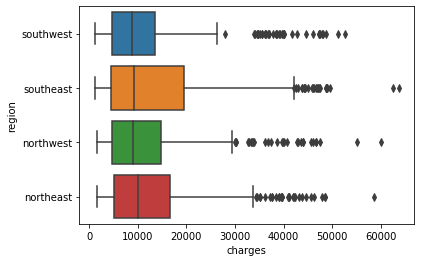

In [90]:
#Interquatile range for southeast higher than other regions
sns.boxplot(x='charges',y='region',data=df2)

In [91]:
#lets try to find biovariate relationships between cateogrical variables

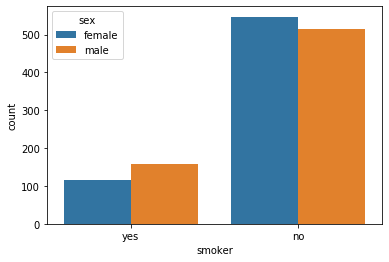

In [92]:
#More smokers and non smokers in the dataset
#Nearly equal number of males and female amoung smoker and non smoker populations
sns.countplot(x='smoker',data=df2,hue='sex')

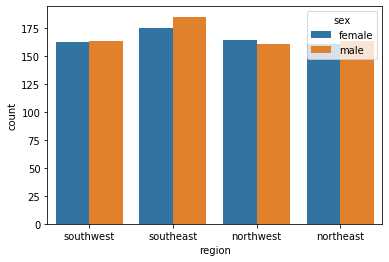

In [93]:
#Nearly equal reprensentation of male and female across all regions
sns.countplot(x='region',data=df2,hue='sex')

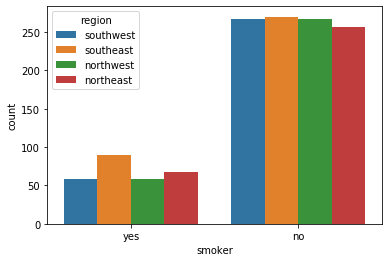

In [94]:
#all regions equally representated in the smoker and non smoker populations
sns.countplot(x='smoker',data=df2,hue='region')

In [95]:
#Whether a person is a smoker or not and their age seem to be the best predictors of their medical costs

<h2> Feature Engineering</h2>

In [96]:
#In order for our variables to be understood my the machine learning models the categorical variables must be converted into a form we can understand
#We can use one hot encoding to convert smoker, sex and region categories into binary form 

In [97]:
smoker=pd.get_dummies(df2['smoker'],drop_first=True)

In [98]:
sex=pd.get_dummies(df2['sex'],drop_first=True)

In [99]:
region=pd.get_dummies(df2['region'],drop_first=True)

In [100]:
pd.concat([df2,smoker,sex,region],axis=1)

,age,sex,bmi,children,smoker,region,charges,yes,male,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,1


In [101]:
df3=pd.concat([df2,smoker,sex,region],axis=1)

In [102]:
df3.head()

,age,sex,bmi,children,smoker,region,charges,yes,male,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0


In [103]:
df4=df3.drop(labels=['region','sex','smoker'],axis=1)

In [104]:
df4.head()

,age,bmi,children,charges,yes,male,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0


In [105]:
#Now we can see the correlation between categorical variables and our label
#Whether an individual smokes or not has highest correaltion with medical costs followed by age
df4.corr()['charges']

age          0.301360
bmi          0.200799
children     0.067569
charges      1.000000
yes          0.786536
male         0.057165
northwest   -0.039826
southeast    0.073863
southwest   -0.043143
Name: charges, dtype: float64

<h2>Model Creation</h2>

In [106]:
#imports linear regression model and library to split data into training and testing sets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [107]:
#Defines the feature 
X= df4.drop('charges',axis=1)

In [108]:
X.head()

,age,bmi,children,yes,male,northwest,southeast,southwest
0,19,27.900,0,1,0,0,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,0,1,1,0,0
4,32,28.880,0,0,1,1,0,0


In [109]:
#Defines the label
y=df4['charges']

In [110]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=29)

In [112]:
lr = LinearRegression().fit(X_train,y_train)

In [113]:
y_pred=lr.predict(X_test)

In [114]:
y_train_pred = lr.predict(X_train)

In [115]:
y_test_pred = lr.predict(X_test)

In [116]:
print(lr.score(X_test,y_test))

0.7814515175707323


In [117]:
#Lets try to find the feature importances using the tree regressor model

In [118]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [119]:
print(model.feature_importances_)

[0.1287749  0.19353925 0.02348256 0.6194697  0.01011302 0.00962032
 0.00850343 0.00649682]


In [58]:
#lets import our model into a pickle file

In [120]:
import pickle

In [121]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [125]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [154]:
array_2=np.array(X_test.iloc[1])

In [160]:
array_2=array_2.reshape(1,-1)

In [161]:
lr.predict(array_2)

array([27638.58777231])